<img src="" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [14]:
adv_data=pd.read_csv('Advertising.csv')
adv_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [16]:
adv_data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [17]:
adv_data.drop(['Unnamed: 0'],axis=1,inplace=True)
adv_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 4: Exploratory Data Analysis

In [29]:
import seaborn as sns

D:\AI_DEEP_Learning\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


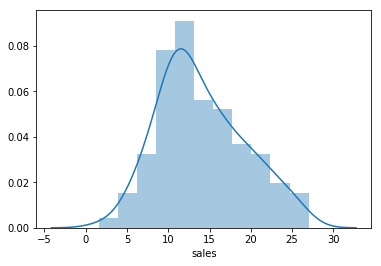

In [30]:
sns.distplot(adv_data.sales)

D:\AI_DEEP_Learning\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


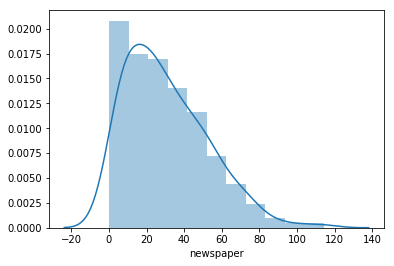

In [31]:
sns.distplot(adv_data.newspaper)

D:\AI_DEEP_Learning\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


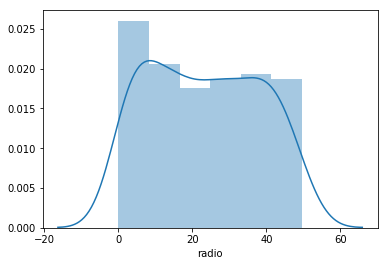

In [32]:
sns.distplot(adv_data.radio)

D:\AI_DEEP_Learning\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


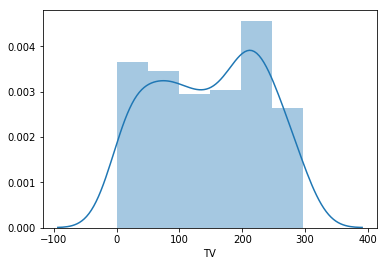

In [47]:
sns.distplot(adv_data.TV)
plt.show()

### Task 5: Exploring Relationships between Predictors and Response

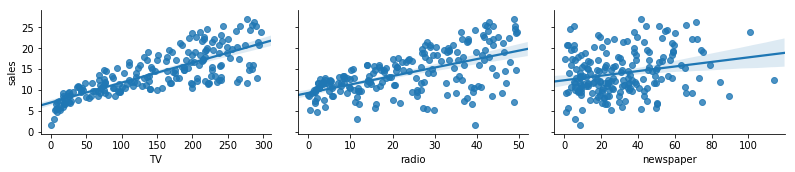

In [46]:
sns.pairplot(adv_data,x_vars=['TV','radio','newspaper'],y_vars='sales',aspect=1.5,kind='reg')
plt.show()

In [48]:
adv_data.TV.corr(adv_data.sales)

0.7822244248616064

In [49]:
adv_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


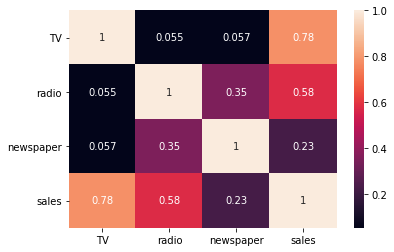

In [53]:
sns.heatmap(adv_data.corr(),annot=True)
plt.show()

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [54]:
X=adv_data[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [57]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [56]:
y=adv_data.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [58]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [1]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

NameError: name 'X' is not defined

In [63]:
train_test_split?

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [62]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Task 7: Interpreting Model Coefficients

In [64]:
b0=lrmodel.intercept_
b0

6.91197261886872

### Task 8: Making Predictions with our Model

In [68]:
yp=lrmodel.predict(X_test)
yp

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616,
       14.81281715, 10.23561056, 17.22389554, 12.18560623, 17.75702244,
       12.94927449, 13.23745119, 20.87413375,  8.14152654, 17.03177774,
       11.7341294 , 10.16836933,  8.11751182, 12.07033555, 12.33449753,
       15.96072101,  8.98204192, 18.86169979, 14.92328489, 18.44384358,
       18.43423769, 18.17487866, 14.10198129, 15.08658502, 18.84248801,
       15.79261793, 17.59372231, 13.12698346, 17.32475739,  7.85334984,
        7.54115841, 11.2538349 ,  7.81012333, 16.71478337,  7.2625876 ,
       13.98671061, 10.66787561, 17.86268723, 16.75800988, 17.9347314 ])

### Task 9: Model Evaluation Metrics

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [72]:
mae=mean_absolute_error(y_test,yp)
mae

2.4643080986027908

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [73]:
mse=mean_squared_error(y_test,yp)
mse

10.310069587813155

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [74]:
rmse=np.sqrt(mse)
rmse

3.210929707703542

In [76]:
lrmodel.score(X_train,y_train)

0.623827651655809